# avocado price and production analysis and predictions

# 1>eda:exploratery data analysis
# 2>applying ml regression algorithems
# 3>comparision between algo's and optimization of prediction..

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('avocado.csv')
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#applying  date as index to dataframe
avocado=pd.read_csv("avocado.csv",parse_dates=True,dayfirst=True,index_col='Date')
avocado

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
2018-01-14,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
2018-01-07,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
dataset.info

<bound method DataFrame.info of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

In [6]:
dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


observations:maximum price of avocado is 3.25/-,minimum price is .44/-,avg price is:1.40/-,

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


here we get no any missing values,dtype:float 9,int:2,object:3

In [8]:
updated=dataset.sort_values(['year','AveragePrice'],ascending=[False,True])

In [9]:
updated.head(50)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8694,0,2018-03-25,0.56,2120511.03,837700.97,162473.38,4190.48,1116146.20,952254.70,161188.17,2703.33,conventional,2018,Houston
8701,7,2018-02-04,0.56,2381742.59,952746.89,300383.28,7990.32,1120622.10,1010539.42,109978.24,104.44,conventional,2018,Houston
8700,6,2018-02-11,0.58,1870874.72,801390.67,156458.96,4407.32,908617.77,747968.17,160355.16,294.44,conventional,2018,Houston
8876,2,2018-03-11,0.58,1619549.79,941189.25,269078.43,14057.17,395224.94,227505.97,161870.08,5848.89,conventional,2018,PhoenixTucson
8874,0,2018-03-25,0.59,1684537.69,932956.86,296968.67,14886.96,439725.20,216076.58,218329.73,5318.89,conventional,2018,PhoenixTucson
8879,5,2018-02-18,0.59,1544983.15,923293.00,242108.74,12876.81,366704.60,228817.23,131177.62,6709.75,conventional,2018,PhoenixTucson
8881,7,2018-02-04,0.59,1998260.47,1029017.42,511201.78,13917.11,444124.16,236056.82,202720.67,5346.67,conventional,2018,PhoenixTucson
8877,3,2018-03-04,0.61,1672899.36,962967.90,268082.25,12934.88,428914.33,266658.69,156802.31,5453.33,conventional,2018,PhoenixTucson
8880,6,2018-02-11,0.64,1490711.97,793896.21,256987.03,12607.40,427221.33,241681.63,179607.48,5932.22,conventional,2018,PhoenixTucson
9025,7,2018-02-04,0.65,10323174.59,4772921.95,1623613.82,38521.35,3888117.47,3351508.25,508738.57,27870.65,conventional,2018,SouthCentral


In [10]:
updated.tail(50)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10042,32,2015-05-17,2.30,3485.39,46.31,2854.86,2.61,581.61,581.61,0.00,0.0,organic,2015,HartfordSpringfield
10601,19,2015-08-16,2.30,16293.09,2843.86,11396.10,789.75,1263.38,1242.18,21.20,0.0,organic,2015,NewYork
10015,5,2015-11-22,2.31,2318.13,138.16,2079.91,1.38,98.68,83.07,15.61,0.0,organic,2015,HartfordSpringfield
10024,14,2015-09-20,2.31,2700.77,179.18,2459.91,2.76,58.92,58.92,0.00,0.0,organic,2015,HartfordSpringfield
10028,18,2015-08-23,2.31,2928.46,117.28,2302.09,0.00,509.09,509.09,0.00,0.0,organic,2015,HartfordSpringfield
10030,20,2015-08-09,2.31,5078.46,1941.88,2656.17,1.36,479.05,479.05,0.00,0.0,organic,2015,HartfordSpringfield
10036,26,2015-06-28,2.31,2790.40,133.18,2522.05,0.00,135.17,135.17,0.00,0.0,organic,2015,HartfordSpringfield
10043,33,2015-05-10,2.31,4484.97,79.20,3796.60,3.89,605.28,605.28,0.00,0.0,organic,2015,HartfordSpringfield
10179,13,2015-09-27,2.31,1592.71,1229.36,49.36,20.66,293.33,293.33,0.00,0.0,organic,2015,Jacksonville
10230,12,2015-10-04,2.31,4655.07,1209.45,3328.95,0.00,116.67,116.67,0.00,0.0,organic,2015,LasVegas


In [11]:
#dataset.reset_index(drop=True)

In [12]:
avocado.sort_values(['AveragePrice'],ascending=False)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2016-10-30,8,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco
2017-04-16,37,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa
2016-11-06,7,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
2017-03-12,42,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
2017-08-27,18,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,0,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
2017-02-26,44,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
2017-03-05,43,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit


# # highest avocado average price is 3.25/- in the year 2016 ,in oct. month noting it warm days and cool evening season in sanfransico this days...
# lowest avocado average price is 0.44/- in year 2017 around the month of march weather condition is cold with gentle breez in CincinnatiDayton.




trying to observe most expensive countries weather conditions and countries with lowes prices 
as weather affects production and production will affect price
top 5> highes pric                                 weather condition
                    1,sanfrancisko 10 oct       warm days and cool evenings
                    2,Tampa        4  april          hot weather
                    3,sanfrancisko 11  nov            warm                                                                              4,MiamiFtLauderdale  3  march    warm good sunshine
                     5,RaleighGreensboro 8   aug    warm humid but cool,,in all countries we observes there is warmness in seasons  
 on the other hand countries having lowes average price has cold breez...
 "Avocado growing needs sunlight. Although avocado trees tolerate some shade, ideal conditions are moderate temperatures, moderate humidity, and plenty of direct sunlight."
 but in our observations it is intresting to find might be causes of having highst price in all those countris with favourable weather condition ...
 this countris must have good production as during given period as weather is supportive and hence prices should be comparatively low on the other hand in countries like CincinnatiDayton cold weather which is tough to tolrate by avocado plants still having lowes average price which  symbolise  production is high but in actually it is not possible as weather is not supportive here this days for avocado it simplu implies as differece in demand for avocado may be demand in top countries is high therefore price is high on the other hand demand in countries lower in list is low..

In [13]:
avocado.reset_index(drop=True)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
avocado.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [15]:
avocado[avocado['AveragePrice']<1].value_counts

<bound method DataFrame.value_counts of             Unnamed: 0  AveragePrice  Total Volume      4046       4225  \
Date                                                                      
2015-12-13           2          0.93     118220.22    794.70  109149.67   
2015-11-15           6          0.99      83453.76   1368.92   73672.72   
2015-11-08           7          0.98     109428.33    703.75  101815.36   
2015-09-27          13          0.99     106803.39   1204.88   99409.21   
2015-03-01          43          0.99      55595.74    629.46   45633.34   
...                ...           ...           ...       ...        ...   
2017-03-05          43          0.99     155011.12  35367.23    5175.81   
2017-02-26          44          0.99     171145.00  34520.03    6936.39   
2017-04-02          39          0.98     402676.23  34093.33   58330.53   
2017-03-26          40          0.90     456645.91  36169.35   51398.72   
2017-03-05          43          0.99     367519.17  61166.48

In [16]:
organic=avocado[avocado['type']=='organic']
organic

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
2015-12-20,1,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
2015-12-13,2,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
2015-12-06,3,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
2015-11-29,4,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


total record we have:18249,out of which 9123 is organic avocado it means-->9126 is convensional fruits but surprisingly there is not much difference in two categories almost 50-50% ,,means organic avocado's are avaiable is good amount.
it would be intresting to see what is price difference between organic and conventional avocado..

In [17]:
organic['AveragePrice'].max()

3.25

In [18]:
organic['AveragePrice'].min()

0.44

In [19]:
organic['AveragePrice'].mean()

1.6539986846432082

In [20]:
conventional=avocado[avocado['type']=='conventional']

In [21]:
conventional['AveragePrice'].max()

2.22

In [22]:
conventional['AveragePrice'].min()

0.46

In [23]:
conventional['AveragePrice'].mean()

1.1580396668858206

# insights: avg price of organic avocado's is high it is :3.25/- whereas of conventional is low comparatively it is 2.22..when taking highest of both
# average price of conventional is low as well which is 1.15 and that of organics is 1.65/-
 

In [24]:
avocado["year"].value_counts(sort=True, ascending = False)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [25]:
avocado.groupby(["year","type"])["AveragePrice"].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

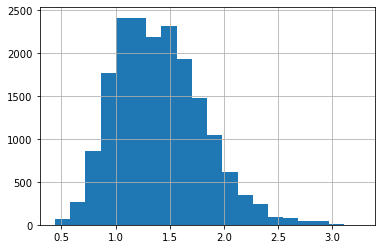

In [26]:
avocado["AveragePrice"].hist(bins=20)
plt.show()

In [27]:
regionFilter = avocado.groupby("region")["AveragePrice"].mean().head(10)
regionFilter

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Name: AveragePrice, dtype: float64

<AxesSubplot:title={'center':'Average price in 10 regions'}, xlabel='region'>

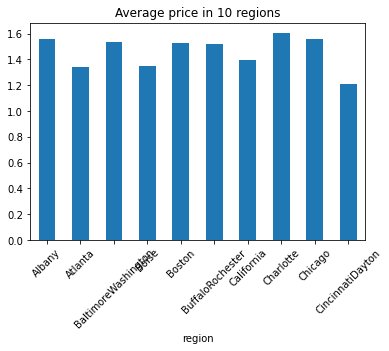

In [28]:
regionFilter.plot(kind = "bar",rot=45,title="Average price in 10 regions")

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

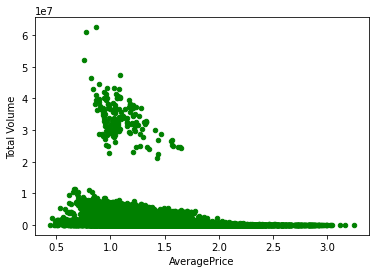

In [29]:
avocado.plot(x="AveragePrice", y="Total Volume", kind="scatter",color='green')

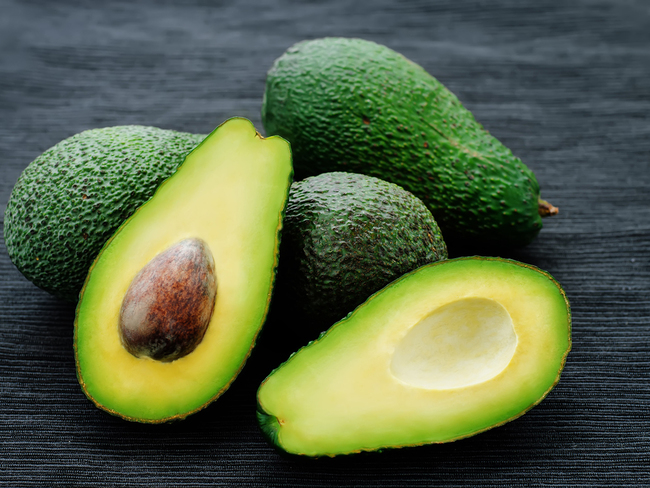

In [30]:
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [31]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

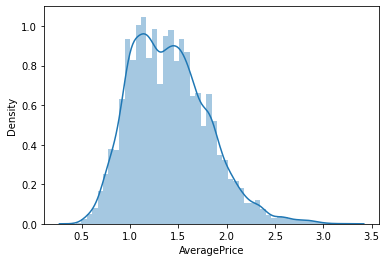

In [32]:
sns.distplot(dataset['AveragePrice'])

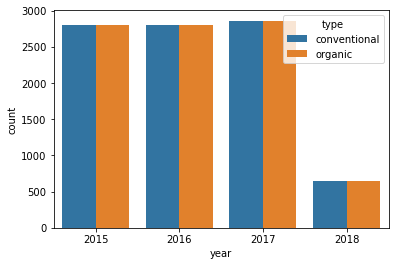

In [33]:
sns.countplot(x='year',data=dataset,hue='type');

we have seen earlier production in year 2018 is very less 2196 around here it is clear that this is equally distributed for both categories in remaining three year fruits are almost equally distributed in both categories we have seen this already.

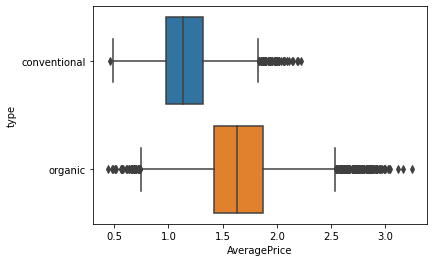

In [34]:
sns.boxplot(y="type", x="AveragePrice", data=dataset);

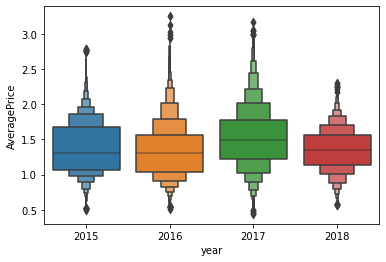

In [35]:
dataset.year=dataset.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=dataset);

# year vs average price
here price in 2017 is quiet high even though production of avocado's almost equeally distributed in 15,16,17 
and average price in the year 2018 is very low instead of production also low this year might be lower demand as well ..

In [36]:
#applying emputing techniques to deal with categorical data
dataset['type']= dataset['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
dataset.Date = dataset.Date.apply(pd.to_datetime)
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset.drop('Date',axis=1,inplace=True)
dataset.Month = dataset.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


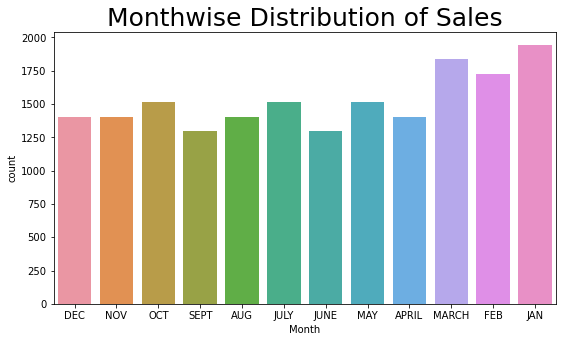

In [37]:
plt.figure(figsize=(9,5))
sns.countplot(dataset['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [38]:
dummies = pd.get_dummies(dataset[['year','region','Month']],drop_first=True)

In [39]:
df_dummies = pd.concat([dataset[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = dataset['AveragePrice']

In [40]:
df_dummies #we have encoded dataset successfully
#this is start of ml...
#df_dummis is independent attributes set,, and target is dependend ...which i have to predict later on

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year_2016,...,Month_DEC,Month_FEB,Month_JAN,Month_JULY,Month_JUNE,Month_MARCH,Month_MAY,Month_NOV,Month_OCT,Month_SEPT
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
#spliting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

In [42]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Text(0, 0.5, 'predicted price')

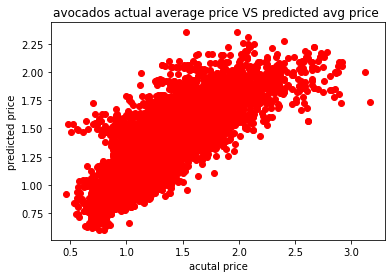

In [44]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
plt.scatter(y_test,y_pred,color='red')
plt.title('avocados actual average price VS predicted avg price ')
plt.xlabel('acutal price')
plt.ylabel('predicted price')

In [45]:
y_pred.shape

(5475,)

In [46]:
y_test

14336    1.44
9265     1.70
6753     1.22
8043     0.93
3884     1.00
         ... 
6427     1.81
8553     1.13
1308     1.08
6188     1.29
6472     1.45
Name: AveragePrice, Length: 5475, dtype: float64

In [47]:
import matplotlib.pyplot as plt

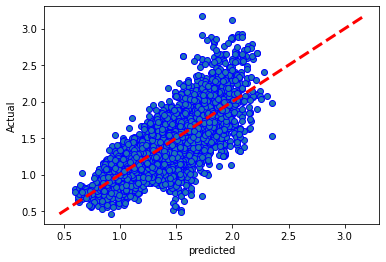

In [48]:
fig,ax=plt.subplots()
ax.scatter(y_pred,y_test,edgecolors=(0,0,1))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=3)
ax.set_xlabel('predicted')
ax.set_ylabel('Actual')
plt.show()

on this plot we can check out where the points lie.some points are far from diagonal line conclude that r squar will be low
its shows model does not fot over the data very well

# evoluation of model 

In [49]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

In [50]:
print("the model performance for testing set")
print("------------------------------------------")
print(f'mean_absolute_error is{mae}')
print(f'mean_squared_error is{mse}')
print(f'r2_score is{r2}')

the model performance for testing set
------------------------------------------
mean_absolute_error is0.1831181638065072
mean_squared_error is0.05924869298526817
r2_score is0.6357701260560353


mae it should be close to 0,here it is 0.18 its good one
mse:lower the values better the model is,,here it is 0.059 close to zero its good model
r2 near 0.9 its good below for its not good ,we have o.6 slight better than average accuracy
ideal model:RMSE/MAE=0,R2:1

# applying polynomial regression to the dataset

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
y2_pred=lin_reg2.predict(poly_reg.fit_transform(X_test))


MemoryError: Unable to allocate 7.53 GiB for an array with shape (12774, 79079) and data type float64

In [ ]:
plt.scatter(y2_pred,y_test,color='blue')


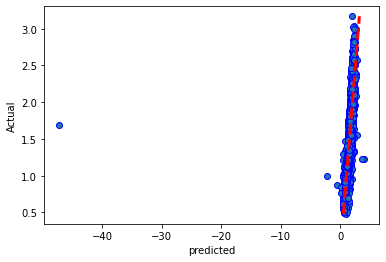

In [67]:
fig,ax=plt.subplots()
ax.scatter(y2_pred,y_test,edgecolors=(0,0,1))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=3)
ax.set_xlabel('predicted')
ax.set_ylabel('Actual')
plt.show()